<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import math
import tensorflow as tf
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,LSTM
from keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

In [4]:
df_news= pd.read_json('/content/drive/My Drive/Sequential NLP/Sarcasm_Headlines_Dataset.json', lines = True)
df_news

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


### Drop `article_link` from dataset 

In [5]:
df_news = df_news.drop(['article_link'], axis = 1)
df_news.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


### Get length of each headline and add a column for that 

In [6]:
df_news['headline_length'] = df_news['headline'].apply(lambda x: len(x.split(" ")))
df_news.head()

,is_sarcastic,headline,headline_length
0,1,thirtysomething scientists unveil doomsday clo...,8
1,0,dem rep. totally nails why congress is falling...,13
2,0,eat your veggies: 9 deliciously different recipes,7
3,1,inclement weather prevents liar from getting t...,8
4,1,mother comes pretty close to using word 'strea...,9


### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [7]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words 
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [8]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(df_news['headline']))
X = tokenizer.texts_to_sequences(df_news['headline'])
X

[[354, 3166, 7473, 2643, 2, 660, 1118],
 [7474, 1774, 757, 3167, 46, 238, 10, 1843, 1047, 7, 1527, 2153, 1844],
 [862, 32, 261, 646, 1483],
 [1593, 6417, 5664, 15, 142, 1, 151],
 [471, 494, 321, 921, 1, 571, 549, 6418],
 [82, 72],
 [83, 279, 1, 4181, 32, 2514, 9, 572, 1355],
 [1845, 776, 5062, 3168, 1119, 24, 226, 24, 1432, 2, 1433, 3358, 4182],
 [2960, 291, 142, 138, 1708, 1, 424, 4, 1594, 355, 1356],
 [2791, 2, 159, 114, 20, 7475],
 [20, 2644, 10, 3359, 6, 425, 4, 3579, 8, 68, 1005, 42, 14, 25],
 [7476, 647, 59, 535, 200, 10, 1357, 625],
 [34, 1, 114, 1709, 5, 1048],
 [573, 1595, 952, 148, 84, 75, 1, 1775, 5, 9020, 7477, 2, 1148, 2],
 [1528, 4183, 11, 6419, 25, 1529, 7, 9021],
 [1317, 378, 7478, 9022, 5063, 79, 15, 12, 1710, 7479, 2154],
 [49, 432, 1149, 5665, 8, 2155, 2792, 2, 3360],
 [49, 13, 322, 99, 2, 30, 2260, 17],
 [536, 58, 410, 9, 3361, 342],
 [3362, 3580, 2961, 97, 57, 1, 2515, 19, 1, 415, 32, 483, 258],
 [1318, 1711, 395, 4, 883, 24, 4184, 2, 1484, 816, 2962],
 [1712, 4, 1

### Pad sequences 
- Pad each example with a maximum length
- Convert target column into numpy array

In [9]:
X = pad_sequences(X, maxlen = maxlen)
y = df_news['is_sarcastic']

In [10]:
X

array([[   0,    0,    0, ...,    2,  660, 1118],
       [   0,    0,    0, ..., 1527, 2153, 1844],
       [   0,    0,    0, ...,  261,  646, 1483],
       ...,
       [   0,    0,    0, ...,    6,  842, 1923],
       [   0,    0,    0, ..., 2359,  837, 6295],
       [   0,    0,    0, ...,    6,  259,  177]], dtype=int32)

In [11]:
y

0        1
1        0
2        0
3        1
4        1
        ..
28614    1
28615    1
28616    0
28617    1
28618    1
Name: is_sarcastic, Length: 28619, dtype: int64

### Vocab mapping
- There is no word for 0th index

In [12]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'at': 14,
 'from': 15,
 'about': 16,
 'by': 17,
 'after': 18,
 'you': 19,
 'this': 20,
 'out': 21,
 'up': 22,
 'be': 23,
 'as': 24,
 'that': 25,
 'it': 26,
 'how': 27,
 'not': 28,
 'he': 29,
 'his': 30,
 'are': 31,
 'your': 32,
 'just': 33,
 'what': 34,
 'all': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'report': 39,
 'into': 40,
 'more': 41,
 'one': 42,
 'have': 43,
 'year': 44,
 'over': 45,
 'why': 46,
 'day': 47,
 'u': 48,
 'area': 49,
 'woman': 50,
 'can': 51,
 's': 52,
 'says': 53,
 'donald': 54,
 'time': 55,
 'first': 56,
 'like': 57,
 'no': 58,
 'her': 59,
 'get': 60,
 'off': 61,
 'old': 62,
 "trump's": 63,
 'life': 64,
 'now': 65,
 'people': 66,
 "'": 67,
 'an': 68,
 'house': 69,
 'still': 70,
 'obama': 71,
 'white': 72,
 'back': 73,
 'make': 74,
 'was': 75,
 'than': 76,
 'women': 77,
 'if': 78,
 'down': 79,
 'when': 80,
 'i': 81,
 'my':

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [13]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

30885


### Load Glove Word Embeddings 

*   List item
*   List item



In [14]:
EMBEDDING_FILE = '/content/drive/My Drive/Sequential NLP/glove.6B.200d.txt'

### Create embedding matrix

In [15]:
embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [16]:
tf.keras.backend.clear_session()

### Define model 
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [17]:
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Compile the model 

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         6177000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               51400     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0

### Fit the model 

In [20]:
batch_size = 500
epochs = 20
history = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.35)

Epoch 1/20
38/38 [==============================] - 9s 116ms/step - loss: 0.6967 - accuracy: 0.5186 - val_loss: 0.6199 - val_accuracy: 0.7085
Epoch 2/20
38/38 [==============================] - 3s 89ms/step - loss: 0.5633 - accuracy: 0.7275 - val_loss: 0.3867 - val_accuracy: 0.8310
Epoch 3/20
38/38 [==============================] - 3s 88ms/step - loss: 0.3609 - accuracy: 0.8576 - val_loss: 0.3491 - val_accuracy: 0.8509
Epoch 4/20
38/38 [==============================] - 3s 89ms/step - loss: 0.2574 - accuracy: 0.9074 - val_loss: 0.3153 - val_accuracy: 0.8650
Epoch 5/20
38/38 [==============================] - 3s 90ms/step - loss: 0.1855 - accuracy: 0.9396 - val_loss: 0.3542 - val_accuracy: 0.8645
Epoch 6/20
38/38 [==============================] - 3s 89ms/step - loss: 0.1277 - accuracy: 0.9580 - val_loss: 0.4081 - val_accuracy: 0.8650
Epoch 7/20
38/38 [==============================] - 3s 86ms/step - loss: 0.0843 - accuracy: 0.9731 - val_loss: 0.4550 - val_accuracy: 0.8631
Epoch 8/20
3

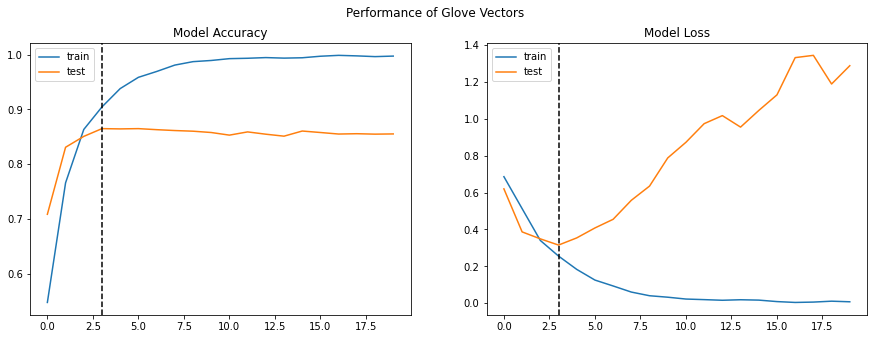

In [21]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance of Glove Vectors")
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
vline_cut = np.where(history.history['val_accuracy'] == np.max(history.history['val_accuracy']))[0][0]
ax1.axvline(x=vline_cut, color='k', linestyle='--')
ax1.set_title("Model Accuracy")
ax1.legend(['train', 'test'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
vline_cut = np.where(history.history['val_loss'] == np.min(history.history['val_loss']))[0][0]
ax2.axvline(x=vline_cut, color='k', linestyle='--')
ax2.set_title("Model Loss")
ax2.legend(['train', 'test'])
plt.show()